Copyright (c) Microsoft Corporation. All rights reserved. Licensed under the MIT License.

# Randomly generated CyberBattle network environment (experimental)

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import random
import cyberbattle.simulation.model as model
import cyberbattle.simulation.actions as actions
import cyberbattle.agents.random_agent as random_agent
from cyberbattle.simulation.model import *
from typing import List
import cyberbattle.simulation.generate_network as g

In [2]:
traffic = g.generate_random_traffic_network(
    seed=1, n_clients=50, 
    n_servers={
                "SMB": 15,
                "HTTP": 15,
                "RDP": 15,
            },
    alpha=np.array([(1, 1), (0.2, 0.5)], dtype=float),
    beta=np.array([(1000, 10), (10, 100)], dtype=float),
)

In [3]:
network=g.cyberbattle_model_from_traffic_graph(traffic)

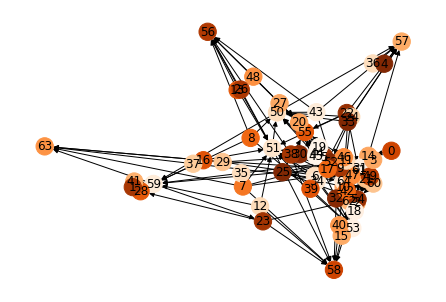

In [4]:
env = model.Environment(network=network, vulnerability_library=dict([]), identifiers=g.ENV_IDENTIFIERS)
env.plot_environment_graph()

In [5]:
network.nodes

NodeView(('0', '14', '2', '53', '5', '50', '6', '51', '7', '52', '61', '8', '56', '59', '10', '60', '62', '12', '58', '13', '57', '15', '16', '63', '21', '22', '55', '23', '28', '24', '25', '27', '30', '31', '32', '33', '34', '35', '38', '40', '64', '41', '43', '44', '54', '45', '47', '48', '20', '49', '18', '26', '36', '37', '39', '1', '3', '4', '9', '42', '11', '17', '19', '29', '46'))

In [6]:
      def ports_from_vuln(vuln: model.VulnerabilityInfo) -> List[model.PortName]:
            if isinstance(vuln.outcome, model.LeakedCredentials):
                return [c.port for c in vuln.outcome.credentials]
            else:
                return []   

In [7]:
all_existing_ports = set({port
                                  for _, v in env.vulnerability_library.items()
                                  for port in ports_from_vuln(v)}).union(
            {port
             for _, node_info in env.nodes()
             for _, v in node_info.vulnerabilities.items()
             for port in ports_from_vuln(v)}).union(
            {service.name
             for _, node_info in env.nodes()
             for service in node_info.services})

In [8]:
all_existing_ports

{'RDP', 'SMB'}

In [9]:
[ node_info.services for _, node_info in env.nodes()]

[[],
 [ListeningService(name='SMB', allowedCredentials=['unique_pwd2', 'unique_pwd26'])],
 [],
 [ListeningService(name='SMB', allowedCredentials=['unique_pwd6', 'unique_pwd29', 'unique_pwd56'])],
 [],
 [ListeningService(name='SMB', allowedCredentials=['unique_pwd10'])],
 [],
 [ListeningService(name='SMB', allowedCredentials=['unique_pwd14'])],
 [],
 [ListeningService(name='RDP', allowedCredentials=['unique_pwd1', 'unique_pwd70'])],
 [ListeningService(name='RDP', allowedCredentials=['unique_pwd9', 'unique_pwd50'])],
 [],
 [ListeningService(name='SMB', allowedCredentials=['unique_pwd16'])],
 [ListeningService(name='RDP', allowedCredentials=['unique_pwd11'])],
 [],
 [ListeningService(name='SMB', allowedCredentials=['unique_pwd27'])],
 [ListeningService(name='RDP', allowedCredentials=['unique_pwd22']),
  ListeningService(name='SMB', allowedCredentials=['unique_pwd28'])],
 [],
 [ListeningService(name='RDP', allowedCredentials=['unique_pwd30'])],
 [],
 [ListeningService(name='SMB', allowedCr

In [10]:
import sys, logging
import gym
from gym import spaces
import cyberbattle.simulation.actions as actions
import cyberbattle.simulation.commandcontrol as commandcontrol
import cyberbattle._env.cyberbattle_env as cyberbattle_env

#logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(levelname)s: %(message)s")

In [13]:
gym_env = gym.make('CyberBattleRandom-v0')

In [14]:
random_agent.run_random_agent(1, 5600, gym_env)

####### rewarded action: {action}
total_reward=2.0 reward=2.0


,id,status,properties,local_attacks,remote_attacks
0,18,owned,[breach_node],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
1,55,discovered,NaN,None,[Traceroute]
2,61,discovered,NaN,None,[Traceroute]


####### rewarded action: {action}
total_reward=3.0 reward=1.0


,id,status,properties,local_attacks,remote_attacks
0,18,owned,[breach_node],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
1,55,discovered,NaN,None,[Traceroute]
2,61,discovered,NaN,None,[Traceroute]


####### rewarded action: {action}
total_reward=5.0 reward=2.0


,id,status,properties,local_attacks,remote_attacks
0,18,owned,[breach_node],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
1,55,discovered,NaN,None,[Traceroute]
2,61,discovered,NaN,None,[Traceroute]
3,60,discovered,NaN,None,[Traceroute]


####### rewarded action: {action}
total_reward=90.0 reward=85.0


,id,status,properties,local_attacks,remote_attacks
0,18,owned,[breach_node],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
1,55,owned,[],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
2,61,discovered,NaN,None,[Traceroute]
3,60,discovered,NaN,None,[Traceroute]


####### rewarded action: {action}
total_reward=92.0 reward=2.0


,id,status,properties,local_attacks,remote_attacks
0,18,owned,[breach_node],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
1,55,owned,[],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
2,61,discovered,NaN,None,[Traceroute]
3,60,discovered,NaN,None,[Traceroute]


####### rewarded action: {action}
total_reward=94.0 reward=2.0


,id,status,properties,local_attacks,remote_attacks
0,18,owned,[breach_node],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
1,55,owned,[],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
2,61,discovered,NaN,None,[Traceroute]
3,60,discovered,NaN,None,[Traceroute]


####### rewarded action: {action}
total_reward=95.0 reward=1.0


,id,status,properties,local_attacks,remote_attacks
0,18,owned,[breach_node],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
1,55,owned,[],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
2,61,discovered,NaN,None,[Traceroute]
3,60,discovered,NaN,None,[Traceroute]


,id,status,properties,local_attacks,remote_attacks
0,18,owned,[breach_node],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
1,55,owned,[],"[ScanWindowsCredentialManagerForRDP, ScanWindo...",[Traceroute]
2,61,discovered,NaN,None,[Traceroute]
3,60,discovered,NaN,None,[Traceroute]


simulation ended
